## LDA
1. LDA stands for Linear Discriminant Analysis.
2. LDA is a dimensionality reduction technique.
3. LDA is a supervised algorithm which uses class labels.
4. The main goal of LDA is to find a lower dimensional projection that maximizes the separation between different classes while minimizing the variance within each class. In other words, LDA aims to find a new feature space where the different classes are well-separated, making it useful for classification tasks.

# Why LDA is needed?
Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are both dimensionality reduction techniques, but they serve different purposes and address different types of problems. Let's explore the problems that PCA faces and how LDA helps solve them:

1. **Preservation of Class Separability:**
   - **Problem with PCA:** PCA aims to find the orthogonal axes (principal components) that capture the maximum variance in the data. However, it doesn't consider class labels or the separability between classes. This means that while PCA reduces dimensionality, it might not be optimal for tasks involving classification or discrimination.

   - **Solution with LDA:** Linear Discriminant Analysis, on the other hand, explicitly considers class labels. LDA seeks to project the data onto a lower-dimensional space while maximizing the separation between classes. It does so by finding a subspace that maximizes the ratio of the between-class scatter to the within-class scatter. This results in better class separation and can lead to improved performance in classification tasks.

2. **Application to Classification:**
   - **Problem with PCA:** PCA is an unsupervised technique that doesn't utilize class information. While it's useful for visualization and reducing data dimensionality for various purposes, it might not be the best choice when the goal is classification.

   - **Solution with LDA:** LDA is a supervised technique that explicitly considers class labels. It aims to find a lower-dimensional representation of the data that optimally separates different classes. This makes LDA well-suited for tasks like classification and pattern recognition.

3. **Focus on Relevant Features:**
   - **Problem with PCA:** PCA considers variance as the primary criterion for selecting components. As a result, it might retain components that capture noise rather than informative features, potentially leading to suboptimal performance in downstream tasks.

   - **Solution with LDA:** LDA takes into account class separability, which means it focuses on features that discriminate between classes. This can lead to a more compact representation that retains the most relevant information for classification while reducing the impact of noise.

4. **Use of Class Labels:**
   - **Problem with PCA:** PCA only relies on the covariance matrix of the data and doesn't incorporate class labels. This can be limiting when dealing with tasks where class information is crucial.

   - **Solution with LDA:** LDA explicitly uses class labels to find a projection that maximizes class separability. This can lead to more accurate classification models by exploiting the class information in the data.

In summary, while PCA is a powerful tool for dimensionality reduction and data visualization, it lacks consideration of class information and might not be optimal for classification tasks. Linear Discriminant Analysis (LDA) addresses these limitations by explicitly incorporating class labels and aiming to maximize class separation in the reduced-dimensional space. LDA is particularly beneficial when the goal is to perform classification or other tasks involving class discrimination.

## Example 1


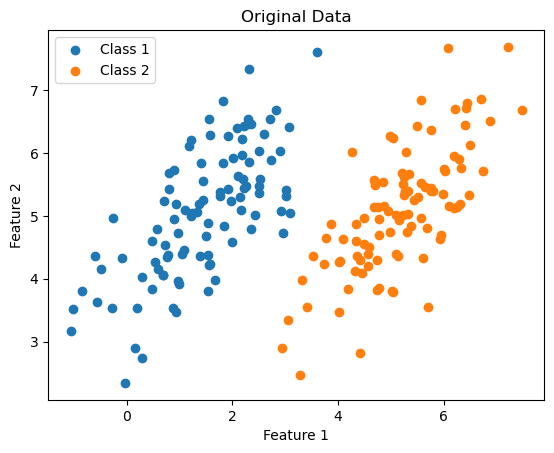

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate points inside two ellipses
np.random.seed(0)

# Parameters for ellipse 1
center1 = np.array([1.5, 5])
## creates an angle on which the ellipse can be created.
covariance1 = np.array([[1, 0.7],
                        [0.7, 1]])
num_samples = 100

## Generate set of points as this is based on ellipse shape
points1 = np.random.multivariate_normal(center1, covariance1, num_samples)

# Parameters for ellipse 2
center2 = np.array([5, 5])
covariance2 = np.array([[1, 0.7],
                        [0.7, 1]])
## Generate set of points for 2nd ellipse
points2 = np.random.multivariate_normal(center2, covariance2, num_samples)

# Plot the generated points
plt.scatter(points1[:, 0], points1[:, 1], label='Class 1')
plt.scatter(points2[:, 0], points2[:, 1], label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()
plt.show()





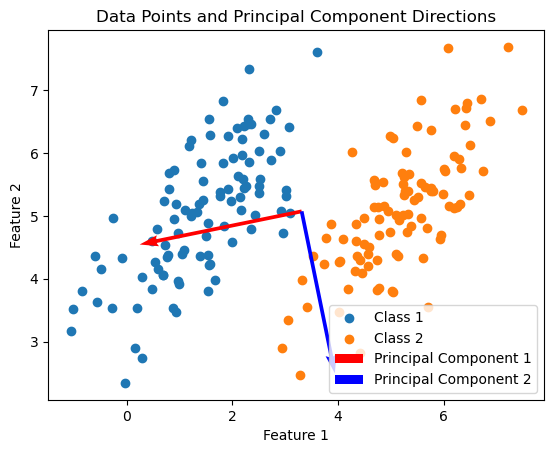

In [31]:
# Combine the points and perform PCA
all_points = np.vstack((points1, points2))
pca = PCA(n_components=2)
transformed_points = pca.fit_transform(all_points)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

plt.scatter(points1[:, 0], points1[:, 1], label='Class 1')
plt.scatter(points2[:, 0], points2[:, 1], label='Class 2')
## Quiver is to To show the arrow of different PCA
plt.quiver(pca.mean_[0], pca.mean_[1], eigenvectors[0, 0], eigenvectors[0, 1], color='r', scale=3, label='Principal Component 1')
plt.quiver(pca.mean_[0], pca.mean_[1], eigenvectors[1, 0], eigenvectors[1, 1], color='b', scale=3, label='Principal Component 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Principal Component Directions')
plt.legend()
plt.show()

In [32]:
eigenvalues, eigenvectors, pca.mean_

(array([4.59296833, 0.87239811]),
 array([[-0.97969203, -0.20050816],
        [ 0.20050816, -0.97969203]]),
 array([3.31062115, 5.0721735 ]))

[4.59296833]


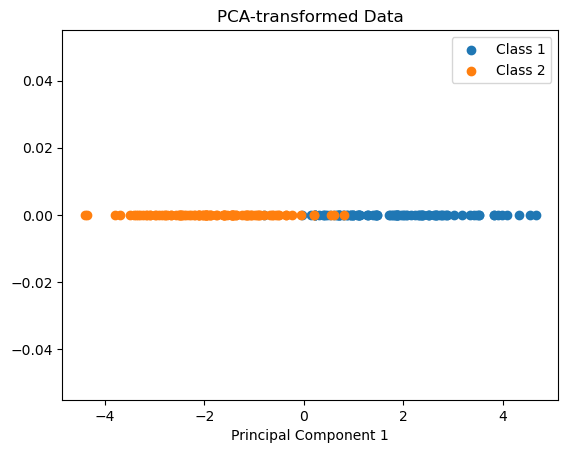

In [34]:
all_points = np.vstack((points1, points2))
pca = PCA(n_components=1)
transformed_points = pca.fit_transform(all_points)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print(eigenvalues)
# Plot the PCA-transformed points
plt.scatter(transformed_points[:num_samples], np.zeros(num_samples), label='Class 1')
plt.scatter(transformed_points[num_samples:], np.zeros(num_samples), label='Class 2')
plt.xlabel('Principal Component 1')
plt.title('PCA-transformed Data')
plt.legend()
plt.show()

## the graph shows difficulty with PCA as it overlaps

In [5]:
eigenvalues, eigenvectors

(array([4.59296833]), array([[-0.97969203, -0.20050816]]))

## Example 2

### This example problem shows the direction of PCA and LDA vectors

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:

# This is based on previous example data. Dont execute next step
#X1=points1
#X2=points2

In [47]:
X1 = [[1,1],[2,2],[3,3],[5,4],[4,5],[6,6],[8,7]]
X2 = [[-2,3],[-1,4],[1,5],[3,6],[4,7],[2,8],[5,9]]

In [48]:
# X1 = [[1.5,1.5],[2.5,2.5],[3.5,3.5],[5.5,4.5],[4.5,5.5],[6.5,6.5],[8.5,7.5]]
# X2 = [[-2.5,3.5],[-1.5,4.5],[1.5,5.5],[3.5,6.5],[4.5,7.5],[2.5,8.5],[5.5,9.5]]

In [69]:
X1 = np.array(X1)
X2 = np.array(X2)
print(X1.shape,X2.shape)

(100, 2) (100, 2)


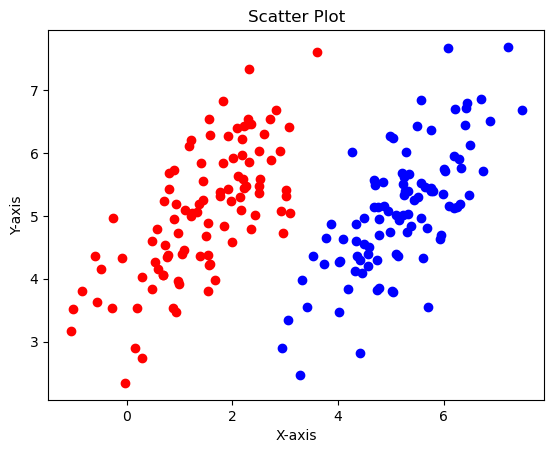

In [70]:
plt.figure()
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X2[:,0],X2[:,1],c='b')
plt.show()

In [71]:
mu1 = np.mean(X1,axis=0)
mu2 = np.mean(X2,axis=0)
print(mu1,mu2)

[1.445585   5.05618088] [5.1756573  5.08816611]


In [72]:
mudiff = mu1 - mu2
print(mudiff)

[-3.7300723  -0.03198523]


In [73]:
X = np.append(X1,X2,axis=0)
print(X.shape)

(200, 2)


In [74]:
mu = np.mean(X,axis=0)
print(mu)

[3.31062115 5.0721735 ]


In [75]:
C1 = np.cov(X1.T,bias=True)
print(C1)

[[1.02472374 0.73295611]
 [0.73295611 1.06031704]]


In [76]:
C2 = np.cov(X2.T,bias=True)
print(C2)

[[0.86089929 0.66179143]
 [0.66179143 0.97290793]]


In [77]:
Sw = C1 + C2
print(Sw)

[[1.88562304 1.39474754]
 [1.39474754 2.03322497]]


In [78]:
C = np.cov(X.T,bias=True)
print(C)

[[4.42117136 0.72720058]
 [0.72720058 1.01686825]]


In [79]:
u = np.matmul(np.linalg.inv(Sw),mudiff)
u = np.matrix(u)
print(u.shape)

(1, 2)


In [80]:
Ucap = u / np.linalg.norm(u)         # LDA unit Vector
print(Ucap)

[[-0.82614303  0.56346046]]


In [81]:
eigenValue,eigenVector = np.linalg.eig(C)

In [82]:
print(eigenValue)
print(eigenVector)

[4.57000349 0.86803612]
[[ 0.97969203 -0.20050816]
 [ 0.20050816  0.97969203]]


In [83]:
eigenVector[:,0]  # Principal PCA Vector

array([0.97969203, 0.20050816])

[[-0.82614303  0.56346046]
 [ 0.97969203  0.20050816]]


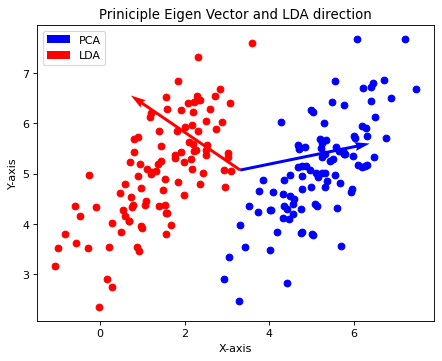

In [84]:
ucap = np.array(Ucap)[0]
Vector = eigenVector[:,0]
V = np.array([ucap,Vector])
origin = [0], [0] # origin point
print(V)

plt.figure(dpi=80)
plt.title("Priniciple Eigen Vector and LDA direction")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X2[:,0],X2[:,1],c='b')
plt.quiver(mu[0],mu[1], V[1,0], V[1,1], color='b', scale=3, label='PCA')
plt.quiver(mu[0],mu[1], V[0,0], V[0,1], color='r', scale=3, label='LDA')
plt.legend()
plt.show()

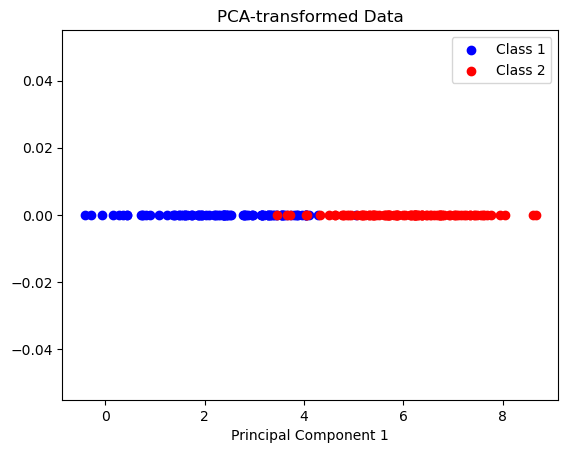

In [85]:
LDA_projected_X=np.dot(X, Vector.T)

num_samples=X1.shape[0]
plt.scatter(LDA_projected_X[:num_samples], np.zeros(num_samples),c='b', label='Class 1')
plt.scatter(LDA_projected_X[num_samples:], np.zeros(num_samples),c='r', label='Class 2')
plt.xlabel('Principal Component 1')
plt.title('PCA-transformed Data')
plt.legend()
plt.show()




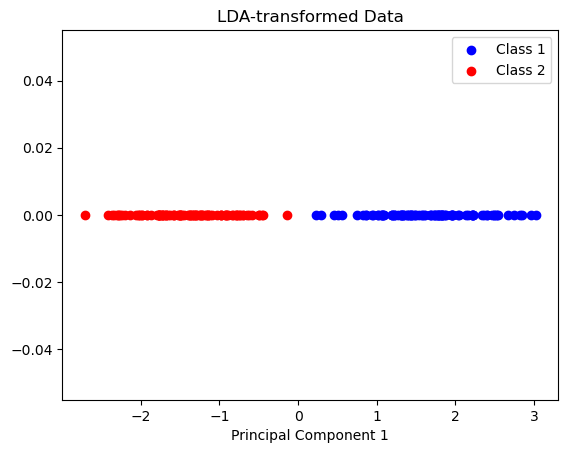

In [86]:
LDA_projected_X=np.dot(X, ucap.T)

num_samples=X1.shape[0]
plt.scatter(LDA_projected_X[:num_samples], np.zeros(num_samples),c='b', label='Class 1')
plt.scatter(LDA_projected_X[num_samples:], np.zeros(num_samples),c='r', label='Class 2')
plt.xlabel('Principal Component 1')
plt.title('LDA-transformed Data')
plt.legend()
plt.show()

# LDA on a Binary-class dataset

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier # Used for checking the performance of LDA

In [89]:
dataset = np.genfromtxt("data/CheckerBoard_Dataset.csv",delimiter=',')
dataset.shape

(200, 3)

In [90]:
X , y = dataset[:,:-1], dataset[:,-1]
labels = np.unique(y)
print(labels)

[0. 1.]


In [91]:
X_p = np.array([X[i] for i in range(len(y)) if y[i]==labels[0]])
X_n = np.array([X[i] for i in range(len(y)) if y[i]==labels[1]])

In [92]:
print(X_p.shape,X_n.shape)

(100, 2) (100, 2)


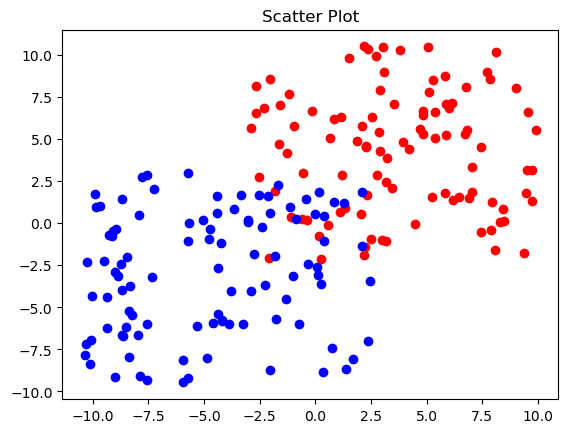

In [93]:
plt.figure()
plt.title("Scatter Plot")
plt.scatter(X_p[:,0],X_p[:,1],c='r')
plt.scatter(X_n[:,0],X_n[:,1],c='b')
plt.show()

In [94]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)
accuracy = tree.score(X_test,y_test)
print("Accuracy",accuracy)

Accuracy 0.8666666666666667


In [96]:
LDA = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

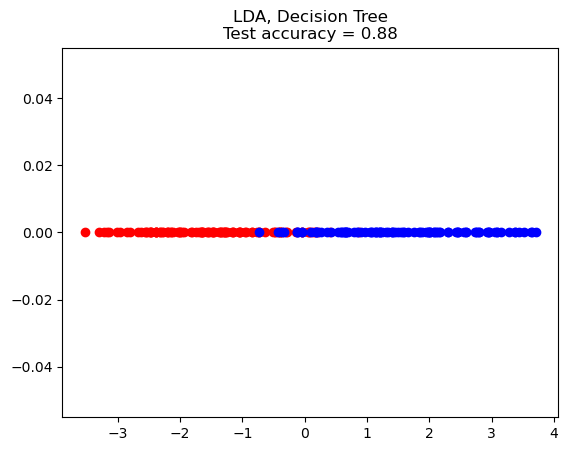

In [97]:
# Fit the method's model
LDA.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(LDA.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(LDA.transform(X_test), y_test)
X_p_transformed = LDA.transform(X_p)
X_n_transformed = LDA.transform(X_n)
plt.figure()
plt.scatter(X_p_transformed,np.zeros(len(X_p_transformed)),c='r')
plt.scatter(X_n_transformed,np.zeros(len(X_n_transformed)),c='b')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()

# LDA on a Multi-class Dataset(Iris)

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

In [116]:
# also try by changing to following dataset - load_breast_cancer
iris = datasets.load_iris() # iris data set
X = iris.data
y = iris.target
print(iris.keys())
features=iris.feature_names
target_names = iris.target_names
print(features)
print(target_names)
colors = ['navy', 'green', 'red']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## Ploting data in 3D

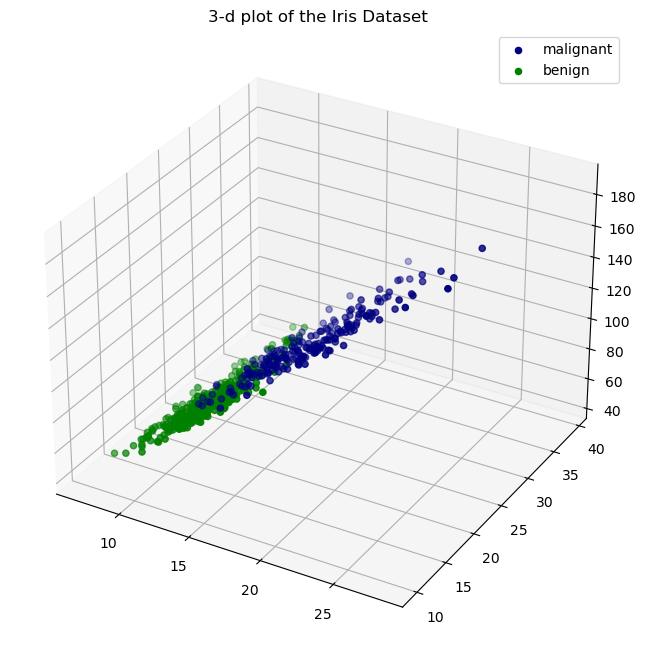

In [117]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of the Iris Dataset")
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1],X[y == i, 2], color = color,
                label = target_name)
plt.legend(loc='best')
plt.show()

## Ploting different attribute of data to check which contribute more

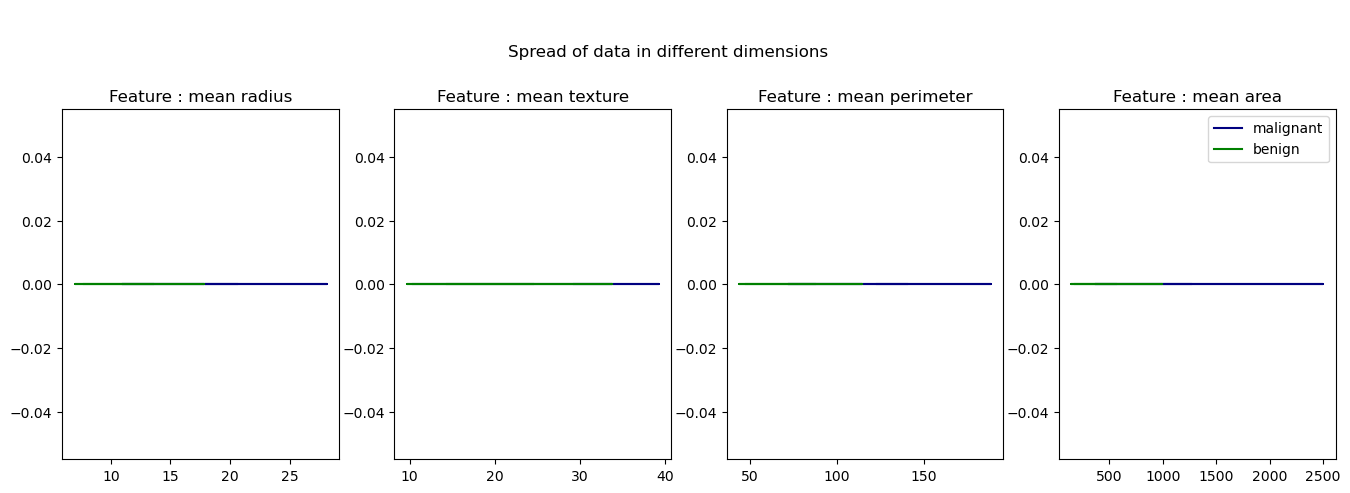

In [118]:
# Create figure
fig = plt.figure(figsize=(25, 10))
fig.suptitle("\n\nSpread of data in different dimensions" )

# Plot results
for j in range(4):
    ax = fig.add_subplot(2, 6, 2 + j + (j >3))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.set_title("Feature : %s" %(features[j]))
        ax.plot(X[y == i, j],np.zeros_like(X[y == i, j]), color=color,label=target_name)
plt.legend(loc='best')
plt.show()

In [119]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [120]:
# Use a Decision Tree classifier to evaluate the methods
tree = DecisionTreeClassifier(criterion='entropy')

In [121]:
tree.fit(X_train,y_train)
acc = tree.score(X_test,y_test)
print("Without LDA",acc)

Without LDA 0.9005847953216374


In [122]:
lda2 = LinearDiscriminantAnalysis(n_components=2) # model for reduction in 2D
lda1 = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

## Checking Accuracy after reducing data to 2D

In [123]:
# Fit the method's model
lda2.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda2.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda2.transform(X_test), y_test)
print("acuracy", acc)

X_2 = lda2.transform(X)
plt.figure(figsize=(12,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

## Checking Accuracy after reducing data to 1D

acuracy 0.9590643274853801


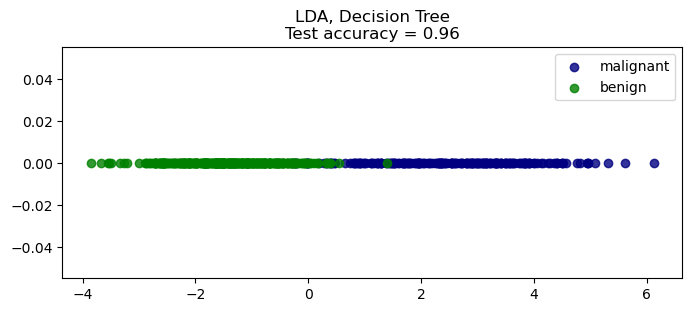

In [124]:
# Fit the method's model
lda1.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda1.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda1.transform(X_test), y_test)
print("acuracy", acc)
X_1 = lda1.transform(X)
plt.figure(figsize=(8,3))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_1[y == i, 0],np.zeros_like(X[y == i, j]), alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()